# Sentiment Analysis form Web Scrapped Data

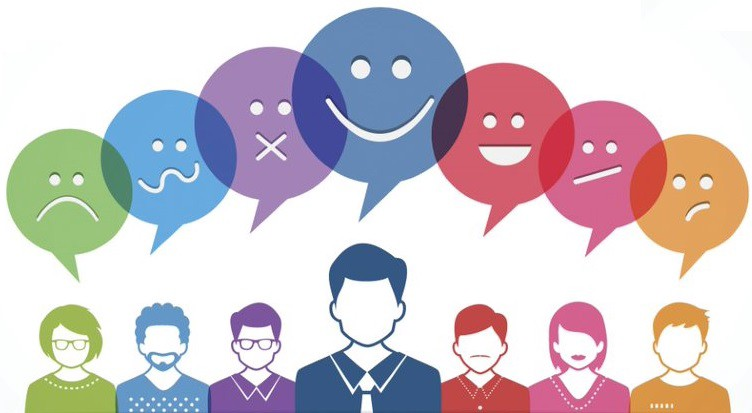

Sentiment analysis, also referred to as opinion mining, is an approach to natural language processing (NLP) that identifies the emotional tone behind a body of text. This is a popular way for organizations to determine and categorize opinions about a product, service, or idea.

In this project we perform will learn how to do Web Scrapping and then on that Web Scrapped data we will perform some Nautral Language Processing Techniques

### Time Line for the Project:
- Importing Libraries and Data Set
- Perfroming Web Scraping
- Data Preprocessing
- Perfroming Sentiment Analysis

In [19]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


#### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

#### Reading our Link File

In [3]:
links = pd.read_excel('Input.xlsx')
links.head()

,URL_ID,URL
0,1,https://insights.blackcoffer.com/how-is-login-...
1,2,https://insights.blackcoffer.com/how-does-ai-h...
2,3,https://insights.blackcoffer.com/ai-and-its-im...
3,4,https://insights.blackcoffer.com/how-do-deep-l...
4,5,https://insights.blackcoffer.com/how-artificia...


Now we will scrape data from the data given in these links

In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# Set up the correct driver
service = Service(executable_path=r"C:\Users\Admin\OneDrive\Desktop\chromedriver.exe")
driver = webdriver.Chrome(service=service)

Making functions to scrape data from the links

In [5]:
## funtion to scrape data from the links
def scrape_data(link):
    global driver
    driver.get(link)
    title=driver.find_element(By.XPATH,"//div[contains(@class,'td-post-content')]")
    driver.implicitly_wait(10)
    return title.text

In [6]:
## function to save the scrapped files
def save_file(scrapdata):
    for data in scrapdata:
        name=str(data['URL_ID'])+".txt"
        
        f=open("./Articles/"+name,'w+',encoding='utf-8')
        f.write(data['TEXT'])
        f.close()

#### Perfroming Scraping operation 

In [7]:
data = []

for index, row in links.iterrows():
    item={}
    item['URL_ID']=row['URL_ID']
    item['TEXT']=scrape_data(row['URL'])
    scrapdata.append(element)
save_file(data)

NameError: name 'scrapdata' is not defined

In [9]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Function to scrape data from the links
def scrape_data(link):
    global driver
    driver.get(link)
    
    # Wait for the element to be present (with a timeout of 10 seconds)
    try:
        title = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.XPATH, "//div[contains(@class,'td-post-content')]"))
        )
        return title.text
    except Exception as e:
        print(f"Error scraping {link}: {str(e)}")
        return None  # Return None if there's an error

# Function to save the scraped data to files
def save_file(scrapdata):
    for data in scrapdata:
        name = str(data['URL_ID']) + ".txt"
        
        with open("./Articles/" + name, 'w+', encoding='utf-8') as f:
            f.write(data['TEXT'])

# Initialize empty list to store the scraped data
scrapdata = []

# Assuming 'links' is a pandas DataFrame containing URL_ID and URL columns
for index, row in links.iterrows():
    item = {}
    item['URL_ID'] = row['URL_ID']
    item['TEXT'] = scrape_data(row['URL'])
    if item['TEXT']:  # Only append if data is successfully scraped
        scrapdata.append(item)

# Save the scraped data
save_file(scrapdata)


Error scraping https://insights.blackcoffer.com/how-do-deep-learning-models-predict-old-and-new-drugs-that-are-successfully-treated-in-healthcare/: Message: 
Stacktrace:
	GetHandleVerifier [0x00007FF6B1C202F5+28725]
	(No symbol) [0x00007FF6B1B82AE0]
	(No symbol) [0x00007FF6B1A1510A]
	(No symbol) [0x00007FF6B1A693D2]
	(No symbol) [0x00007FF6B1A695FC]
	(No symbol) [0x00007FF6B1AB3407]
	(No symbol) [0x00007FF6B1A8FFEF]
	(No symbol) [0x00007FF6B1AB0181]
	(No symbol) [0x00007FF6B1A8FD53]
	(No symbol) [0x00007FF6B1A5A0E3]
	(No symbol) [0x00007FF6B1A5B471]
	GetHandleVerifier [0x00007FF6B1F4F30D+3366989]
	GetHandleVerifier [0x00007FF6B1F612F0+3440688]
	GetHandleVerifier [0x00007FF6B1F578FD+3401277]
	GetHandleVerifier [0x00007FF6B1CEAAAB+858091]
	(No symbol) [0x00007FF6B1B8E74F]
	(No symbol) [0x00007FF6B1B8A304]
	(No symbol) [0x00007FF6B1B8A49D]
	(No symbol) [0x00007FF6B1B78B69]
	BaseThreadInitThunk [0x00007FF99F3AE8D7+23]
	RtlUserThreadStart [0x00007FF9A015BF2C+44]

Error scraping https://insi

FileNotFoundError: [Errno 2] No such file or directory: './Articles/1.txt'

#### Making a data frame of scrapped data

In [12]:
import os

# Function to save the scraped data to files
def save_file(scrapdata):
    # Ensure the Articles directory exists
    if not os.path.exists("./Articles"):
        os.makedirs("./Articles")  # Create the directory if it doesn't exist

    for data in scrapdata:
        name = str(data['URL_ID']) + ".txt"
        
        with open("./Articles/" + name, 'w+', encoding='utf-8') as f:
            f.write(data['TEXT'])

# Assuming you have already scraped the data, call save_file(scrapdata) after.
save_file(scrapdata)


In [13]:
import os

# Function to read and display content from all the text files in the Articles folder
def view_stored_data():
    folder_path = "./Articles"
    
    # List all files in the Articles directory
    files = os.listdir(folder_path)
    
    # Loop through each file and print its content
    for file_name in files:
        if file_name.endswith(".txt"):  # Make sure it's a .txt file
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                print(f"--- Content of {file_name} ---")
                print(f.read())  # Print the content of the file
                print("\n" + "-"*50 + "\n")

# Call the function to view the data
view_stored_data()


--- Content of 1.txt ---
When people hear AI they often think about sentient robots and magic boxes. AI today is much more mundane and simple—but that doesn’t mean it’s not powerful. Another misconception is that high-profile research projects can be applied directly to any business situation. AI done right can create an extreme return on investments (ROIs)—for instance through automation or precise prediction. But it does take thought, time, and proper implementation. We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the C-suite down.
“Artificial Intelligence (AI) is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense, learn, reason and take action.”3 Lately there has been a big rise in the day-to-day use of machines powered by AI. These machi

--- Content of 114.txt ---
The business of business is no longer to do just business or increase the bottom line to maximize shareholder value. Rather, the concept of business is moving towards a new dimension of sustainable business, the triple bottom line. People, planet, and profits are the core ideologies that are rooted in sustainable business. Sustainability is taken into account when companies want to create long-term value creation along with strategies that promote the longevity of the company. As corporate accountability rises, expectations and need for transparency among stakeholders increases therefore companies have started to recognize the need to be sustainable to stay alert and alive.
Business globalization that has happened over the previous few decades has made some companies more powerful than some national governments, making it easy for them to exploit inexpensive labor, plunder natural resources, causing severe impacts through pollution on the natural environment,

--- Content of 126.txt ---
Disruption in Fintech – The Lightning Network
Blockchain or the Distributed Ledger Technology has already been around for some time now. Cryptocurrencies like Bitcoin, based on the Blockchain technology, are making entry into the formal finance world and increasingly becoming a medium for exchange. Though there are many potential use cases for Cryptocurrencies and the Indian Government is very critical about implementing the technology in banking and finance, it still has a lot of issues to be resolved before we can commercially use it for transactions.
Some of the most important drawbacks of Cryptocurrencies like Bitcoin right now are as below:
Scalability:
Bitcoin can have <7 transactions per second as compared to ~47,000 via payment network giants like Visa
There is a block limit of 1MB, which amounts to 8GBs per 10 min on a Bitcoin block (to match 47,000 transactions per second). This essentially means that home computers cannot process this currently and

--- Content of 139.txt ---
In the past decade, there has been a fundamental change in the daily operations of the bank. With completely aiming to transform the operations digitally, the banks especially the private banks have invested a lot in technology to reduce manual labor and to create a more streamlined process. However, this has exposed the banks to unwanted new risks. While banks take a strategic risk aversion strategy to minimize risk, the phases they have been through are restored -> rationalize -> reinvent, they have clearly marked only the first phase of restore through strict regulations and compliances from the regulating bodies both in India and internationally. Making it clear that we are far away from seeing the risk-free banking utopia. Risk management is not the same as risk avoidance. It is about making risk-informed decision to diminish the probability of it affecting the bank. In the long term, it talks about sustained growth. And while processing these risks they

--- Content of 154.txt ---
The global healthcare industry is expected to grow at a CAGR of 24.7%. This is made possible by the leveraging of various analytics tools and practices by the healthcare providers for improving their operational efficiency.
The United States is at the front of the growth, accounting for 65.84% which can be attributed to the country’s substantial investment in healthcare.  Europe and Asia are on a path of steady growth with increased expenditure on technology, R&D and the emergence of Big Data.
The volume of data available is expected to be increasing at an exponential rate in the years ahead. Current cumbersome techniques of evaluation will soon have to pave the way for advanced analytics. These techniques, which have the ability to process, act on, manage and distribute data from a variety of sources, will become the backbone of the healthcare sector. With this evaluation, the vast health data will be better understood and more effective, real-time, specific

--- Content of 164.txt ---
The ongoing digitalization of the business world is putting companies at risk of cyber-attacks more than ever before. Big data analysis has the potential to offer protection against these attacks. 
Cyber Security Threats are Rising
Since the notion of a corporate security perimeter has all but disappeared in recent years thanks to the growing adoption of cloud and mobile services, information security has experienced a profound paradigm shift from traditional perimeter protection tools towards monitoring and detecting malicious activities within corporate networks.
Increasingly sophisticated attack methods used by cybercriminals and the growing role of malicious insiders in several recent large scale security breaches clearly indicate that traditional approaches to information security can no longer keep up.
Companies Have to Rethink their Cyber Security Concepts
Analytics is the key element in leveraging cyber resilience. With increasingly advanced and persi

--- Content of 26.txt ---
eLearning as technology becomes more affordable in higher education but having a big barrier in the cost of developing its resources. Deep learning using artificial intelligence continues to become more and more popular and having impacts on many areas of eLearning. It offers online learners of the future intuitive algorithms and automated delivery of eLearning content through modern LMS platforms. This paper aims to survey various applications of deep learning approaches for developing the resources of the eLearning platform, in which predictions, algorithms, and analytics come together to create more personalized future eLearning experiences. In addition, deep learning models for developing the contents of the eLearning platform, deep learning framework that enable deep learning systems into eLearning and its development, benefits & future trends of deep learning in eLearning, the relevant deep learning-based artificial intelligence tools, and a platform ena

--- Content of 41.txt ---
Data Science is gaining popularity exponentially over the past decade, and thanks to that we are now enjoying better products, recommendations, and smoother life. Data science is an interdisciplinary subject that includes statistics, math, IT, etc.
Now there is so much to do in Data Science,  so we need an arrangement where all this can be accessible in one place. It will be very hectic to go to hundreds of different resources while doing analysis or building models. But don’t worry, PYTHON is there for you.
Yes, you read it right, Python is a general programming language that can provide everything you need for Data Science. Several features that have made Python become the choice of data science in past times are:
1. Python is a progressively typed language, so the variables are defined automatically.
2. Python is more readable and uses lesser code to play out a similar task when contrasted with other programming languages.
3. Python is specifically typed. I

--- Content of 56.txt ---
Mr. Sakamoto is a bonsai artist, lives downtown Kyoto, Japan. Bonsai is a Japanese art form that is the cultivation of small trees in a small or medium container. He is in this field of business for the last ten years and he loves what he does on a daily basis. People from different cities in Japan, come to buy his artwork. But, in the early stage of his business, he was just another regular Bosai artist. His popularity has increased because of the stories he tells for every art he is selling. His customer immediately loved him for this while buying A Bonsai art. He loved to sell his customer with his artwork and a story related to that product which resurrects his presence through his art in customers. Soon enough his business thrived and nowadays he is always busy. After the digital revolution, although his sales increased, he was not happy. He was not satisfied. Something is eating up his mind day by day. He could not understand what’s the reason behind his

--- Content of 70.txt ---
The COVID 19 pandemic has reshaped the fundamental fabric of our world. Initiating in China in late December 2019, the virus has since then spread to every corner of the world, infecting millions in its wake. Countries around the world have responded by shutting down their economies and advocating lockdowns of varying degrees. India has arguably had one of the most stringent lockdowns of all countries, restricting the movement of people, goods and effectively transforming every city into a ghost town.
Due to such stringent restrictions on movement, the economy has received a fatal blow. The virus arrived in India at a time when the country was already in strife, dealing with a slowing GDP growth rate and an ever-increasing fiscal deficit. The lockdown has simply exacerbated the economic predicament; pushing multiple businesses and industries to a moribund state. Other countries have also faced a similar predicament, particularly in the US and Europe, both bein

--- Content of 86.txt ---
COVID 19 has bought the world to its knees. With businesses being shut, travel being banned, schools, and colleges being closed, we have observed an impeccable amount of sorrow and despise along with a great amount of mental torture and destruction. Though situations are improving now, and the lockdowns are being lifted, it is a fact that it cannot be shunned that this virus will have a long term impact on people, and the effects will not only be felt economically and physically but also mentally.
We’ve been reading articles regarding the impact of COVID 19 on the economy, education, mental health, and every other possible aspect. But one topic which has not been talked about much is the impact of COVID 19 on office space and co-working industries. Well, it is quite obvious that offices will start functioning now, but, the COVID period hasn’t ended. This means that social distancing will also have to be followed in offices; where it will be a problem to do so 

--- Content of 99.txt ---
The current topic that is burning the world alive is the deadly coronavirus. Let us first understand what this coronavirus actually is. According to the World Health Organization (WHO), the Coronavirus disease which is called the COVID-19 is an infectious disease which is caused by the newly discovered Coronavirus. The COVID-19 virus is a virus that affects different people of the world in different ways. The COVID-19 disease is a respiratory disease and most of the infected people will develop mild to moderate symptoms and recover without even requiring special treatment.  The people who already have underlying medical conditions and those people who are over 60 years old have a higher risk of developing severe disease and death.
Common symptoms include:
fever
tiredness
dry cough.
Other symptoms include:
shortness of breath
aches and pains
sore throat
and very few people in the world will report diarrhea, nausea, or a runny nose.
The people living in this wor

In [15]:
from os import listdir
import os

# Define the path to the directory
path = 'files'

# Check if the directory exists
if os.path.exists(path):
    # List all the files in the directory
    files = listdir(path)
    # Print the list of files
    for file in files:
        print(file)
else:
    print(f"The directory '{path}' does not exist.")


The directory 'files' does not exist.


In [16]:
from os import listdir
path = 'files'
files = listdir(path)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'files'

In [ ]:
df = pd.DataFrame(columns=["filename","text"])

for file in files:
    f= open("./files/"+file,"r",encoding='utf-8')
    text = f.read()
    sr = int(file.replace(".0.txt",""))

    df = df.append({"File":sr,"Content":text},ignore_index=True)

In [ ]:
df = df.sort_values("File")
df
df.to_csv("content.csv",index=None)

In [17]:
import os
import pandas as pd

# Function to read and store content from text files into a DataFrame
def view_stored_data():
    folder_path = "./Articles"
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The directory '{folder_path}' does not exist.")
        return

    # List all files in the directory
    files = os.listdir(folder_path)
    
    # Initialize a list to store data
    data = []

    # Loop through each file and read its content
    for file_name in files:
        if file_name.endswith(".txt"):  # Ensure it's a .txt file
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()  # Read and clean content
                
                # Append file name and content to the list
                data.append({"File": file_name, "Content": content})

    # Convert list to DataFrame
    df = pd.DataFrame(data)

    # Sort the DataFrame by file name
    df = df.sort_values("File")

    # Save DataFrame to CSV
    df.to_csv("content.csv", index=False)

    # Load the saved CSV and display the first few rows
    df = pd.read_csv('content.csv')
    print(df.head())  # Display the first few rows

# Call the function
view_stored_data()


      File                                            Content
0    1.txt  When people hear AI they often think about sen...
1   10.txt  Artificial intelligence (AI) is intelligence d...
2  100.txt  Coronavirus, now globally carrying the status ...
3  101.txt  India has been beset by financial scams since ...
4  102.txt  It was 14th March and I was altogether prepare...


Now we have the text, let us do some pre processing of the data before we perform sentiment analysis on it

In [18]:
df =pd.read_csv('content.csv')
df.head()

,File,Content
0,1.txt,When people hear AI they often think about sen...
1,10.txt,Artificial intelligence (AI) is intelligence d...
2,100.txt,"Coronavirus, now globally carrying the status ..."
3,101.txt,India has been beset by financial scams since ...
4,102.txt,It was 14th March and I was altogether prepare...


In [22]:
import os
import pandas as pd

# Function to read and store content from text files into a DataFrame
def view_stored_data():
    folder_path = "./Articles"
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The directory '{folder_path}' does not exist.")
        return

    # List all files in the directory
    files = os.listdir(folder_path)
    
    # Initialize a list to store data
    data = []

    # Loop through each file and read its content
    for file_name in files:
        if file_name.endswith(".txt"):  # Ensure it's a .txt file
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()  # Read and clean content
                
                # Remove '.txt' extension to keep only the number
                file_number = file_name.replace(".txt", "")

                # Append to the list
                data.append({"Filename": file_number, "text": content})

    # Convert list to DataFrame
    df = pd.DataFrame(data)

    # Sort the DataFrame by filename numerically
    df["Filename"] = df["Filename"].astype(int)  # Convert to integer for sorting
    df = df.sort_values("Filename")

    # Save DataFrame to CSV
    df.to_csv("content.csv", index=False)

    # Load the saved CSV and display the first few rows
    df = pd.read_csv('content.csv')
    print(df.head())  # Display the first few rows

# Call the function
view_stored_data()


   Filename                                               text
0         1  When people hear AI they often think about sen...
1         2  With increasing computing power and more data,...
2         3  If you were a fan of the 90’s film Clueless ba...
3         5  From the stone age to the modern world, from h...
4         6  Artificial intelligence (AI) is the developmen...


In [24]:
import os
import pandas as pd

# Function to read and store content from text files into a DataFrame
def view_stored_data():
    folder_path = "./Articles"
    
    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"The directory '{folder_path}' does not exist.")
        return

    # List all files in the directory
    files = os.listdir(folder_path)
    
    # Initialize a list to store data
    data = []

    # Loop through each file and read its content
    for file_name in files:
        if file_name.endswith(".txt"):  # Ensure it's a .txt file
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()  # Read and clean content
                
                # Remove '.txt' extension to keep only the number
                file_number = file_name.replace(".txt", "")

                # Append to the list
                data.append({"Filename": file_number, "Text": content})

    # Convert list to DataFrame
    df = pd.DataFrame(data)

    # Sort the DataFrame by filename numerically
    df["Filename"] = df["Filename"].astype(int)  # Convert to integer for sorting
    df = df.sort_values("Filename")

    # Add a new column for the number of sentences
    df["Number of Sentences"] = df["Text"].apply(lambda x: len(x.split('.')))

    # Save DataFrame to CSV
    df.to_csv("content.csv", index=False)

    # Load the saved CSV and display the first few rows
    df = pd.read_csv('content.csv')
    print(df.head())  # Display the first few rows

# Call the function
view_stored_data()


   Filename                                               Text  \
0         1  When people hear AI they often think about sen...   
1         2  With increasing computing power and more data,...   
2         3  If you were a fan of the 90’s film Clueless ba...   
3         5  From the stone age to the modern world, from h...   
4         6  Artificial intelligence (AI) is the developmen...   

   Number of Sentences  
0                   28  
1                   29  
2                   77  
3                   60  
4                   53  


Replacing short form of words

In [25]:
def short_forms():    
    return {
        "cant":"can not",
        "dont":"do not",
        "wont":"will not",
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "couldn't":"could not",
        "wouldn't":"would not",
        "shouldn't":"should not",
        "im":"i am"
        }

In [26]:
import re  ##check if a particular string matches a given regular expression
import string

## funtion to replace the short forms 
def normalization(data):
    data = str(data).lower()
    # URL
    data = re.sub('((www.[^\s]+)|(https?://[^\s]+))',' ',data)
    data = re.sub(r'#([^\s]+)', r'\1', data)

    # Number
    data = ''.join([i for i in data if not i.isdigit()])

    # Punctuation

    for sym in string.punctuation:
        data = data.replace(sym, " ")
    short_form = short_forms()
    data = data.replace("’","'")
    words = data.split()
    converted = [short_form[word] if word in short_form else word for word in words]
    data = " ".join(converted)
    return data

In [27]:
df

,File,Content
0,1.txt,When people hear AI they often think about sen...
1,10.txt,Artificial intelligence (AI) is intelligence d...
2,100.txt,"Coronavirus, now globally carrying the status ..."
3,101.txt,India has been beset by financial scams since ...
4,102.txt,It was 14th March and I was altogether prepare...
...,...,...
160,95.txt,"“Stay at Home”, “Crisis”, “Pandemic”, “COVID-1..."
161,96.txt,“If anything kills over 10 million people over...
162,97.txt,COVID19 affects the world from every way life ...
163,98.txt,"“The more you know about the past, the better ..."


In [29]:
import os
import pandas as pd

# Function for text normalization (Modify as needed)
def normalization(text):
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove leading/trailing spaces
    text = " ".join(text.split())  # Remove extra spaces
    return text

# Function to read and process text files
def view_stored_data():
    folder_path = "./Articles"
    
    # Check if the directory exists
    if not os.path.exists(folder_path):
        print(f"The directory '{folder_path}' does not exist.")
        return

    # List all files in the directory
    files = os.listdir(folder_path)
    
    # Initialize a list to store data
    data = []

    # Read and process each file
    for file_name in files:
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read().strip()
                
                # Remove '.txt' and keep only the number
                file_number = file_name.replace(".txt", "")

                # Normalize text (lowercasing included in normalization function)
                content = normalization(content)

                # Append to list
                data.append({"Filename": file_number, "Text": content})

    # Convert list to DataFrame
    df = pd.DataFrame(data)

    # Convert "Filename" to integer and sort
    df["Filename"] = df["Filename"].astype(int)
    df = df.sort_values("Filename")

    # Add a column for sentence count
    df["Number of Sentences"] = df["Text"].apply(lambda x: len(x.split('.')))

    # Save to CSV
    df.to_csv("content.csv", index=False)

    # Load and display first few rows
    df = pd.read_csv('content.csv')
    print(df.head())

# Call function
view_stored_data()


   Filename                                               Text  \
0         1  when people hear ai they often think about sen...   
1         2  with increasing computing power and more data,...   
2         3  if you were a fan of the 90’s film clueless ba...   
3         5  from the stone age to the modern world, from h...   
4         6  artificial intelligence (ai) is the developmen...   

   Number of Sentences  
0                   28  
1                   29  
2                   77  
3                   60  
4                   53  


In [43]:
df = pd.read_csv('content.csv')

In [44]:
df.head()

,Filename,Text,Number of Sentences
0,1,when people hear ai they often think about sen...,28
1,2,"with increasing computing power and more data,...",29
2,3,if you were a fan of the 90’s film clueless ba...,77
3,5,"from the stone age to the modern world, from h...",60
4,6,artificial intelligence (ai) is the developmen...,53


### Performing Sentiment Analysis

First let us import a dictionary which contains the sentiment analysis words which will act as a reference for our data set words

In [54]:
guide = pd.read_csv('LoughranMcDonald_MasterDictionary_2020.csv')
guide.head()

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Complexity,Syllables,Source
0,AARDVARK,1,312,1.422050e-08,1.335201e-08,3.700747e-06,96,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.367356e-10,8.882163e-12,9.362849e-09,1,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,4.102067e-10,1.200533e-10,5.359747e-08,7,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,15,6.836779e-10,4.080549e-10,1.406914e-07,14,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,8009,3.650384e-07,3.798698e-07,3.523914e-05,1058,0,0,0,0,0,0,0,0,3,12of12inf


Assigning Positive and Negative score to our words based on the dictionary words

In [55]:
pos = [] 
neg =[]
Uncertain = []
for index,row in guide.iterrows():
    if row['Negative']>0:
        neg.append(row['Word'].lower())
    elif row['Positive']>0:
        pos.append(row['Word'].lower())
    elif row['Uncertainty']>0:
        Uncertain.append(row['Word'].lower())

In [56]:
df.head()

,Filename,Text,Number of Sentences
0,1,when people hear ai they often think about sen...,28
1,2,"with increasing computing power and more data,...",29
2,3,if you were a fan of the 90’s film clueless ba...,77
3,5,"from the stone age to the modern world, from h...",60
4,6,artificial intelligence (ai) is the developmen...,53


In [59]:
def positivescore(Text):
    score = 0
    global pos
    words = Text.split()  # Use Text instead of text
    for word in words:
        if word in pos:
            score += 1
    return score

def negativescore(Text):
    score = 0
    global neg
    words = Text.split()  # Use Text instead of text
    for word in words:
        if word in neg:
            score += 1
    return score

# Now apply the functions
df['Positive Score'] = df['Text'].apply(positivescore)
df['Negative Score'] = df['Text'].apply(negativescore)


In [64]:
df.head()

,Filename,Text,Number of Sentences,Positive Score,Negative Score,POLARITY SCORE
0,1,when people hear ai they often think about sen...,28,4,4,0.000000
1,2,"with increasing computing power and more data,...",29,5,5,0.000000
2,3,if you were a fan of the 90’s film clueless ba...,77,28,16,0.272727
3,5,"from the stone age to the modern world, from h...",60,19,13,0.187500
4,6,artificial intelligence (ai) is the developmen...,53,15,10,0.200000


In [66]:
print(df.columns)

Index(['Filename', 'Text', 'Number of Sentences', 'Positive Score',
       'Negative Score', 'POLARITY SCORE'],
      dtype='object')


Getting all the different parameters

In [68]:
df['POLARITY SCORE'] = (df['Positive Score'] - df['Negative Score']) / ((df['Positive Score'] + df['Negative Score']) + 0.000001)
df['WORD COUNT'] = df['Text'].apply(lambda x: len(x.split()))
df['SUBJECTIVITY SCORE'] = (df['Positive Score'] + df['Negative Score']) / ((df['WORD COUNT']) + 0.000001)
df['AVG SENTENCE LENGTH'] = df['WORD COUNT'] / df['Number of Sentences']
df['AVG NUMBER OF WORDS PER SENTENCE'] = df['WORD COUNT'] / df['Number of Sentences']


In [69]:
df.head()

,Filename,Text,Number of Sentences,Positive Score,Negative Score,POLARITY SCORE,WORD COUNT,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,AVG NUMBER OF WORDS PER SENTENCE
0,1,when people hear ai they often think about sen...,28,4,4,0.000000,712,0.011236,25.428571,25.428571
1,2,"with increasing computing power and more data,...",29,5,5,0.000000,632,0.015823,21.793103,21.793103
2,3,if you were a fan of the 90’s film clueless ba...,77,28,16,0.272727,1804,0.024390,23.428571,23.428571
3,5,"from the stone age to the modern world, from h...",60,19,13,0.187500,1232,0.025974,20.533333,20.533333
4,6,artificial intelligence (ai) is the developmen...,53,15,10,0.200000,1116,0.022401,21.056604,21.056604


In [70]:
## for avg length of words
def avgwordlength(text):
    words = text.split()
    no_of_words=len(words)
    total_char=0
    for word in words:
        total_char+=len(word)
    return total_char/no_of_words

In [71]:
## for seeing if the sentence has pronoun
def pronoun(text):
    pronouns = r"(\b(s?i|me|we|my|ours|us|I|Me|We|My|Ours|Us)\b)"
    result = 0

    matches = re.finditer(pronouns,text,re.MULTILINE)
    for nummatch,match in enumerate(matches):
        result+=1
    return result

In [73]:
df['AVG WORD LENGTH'] = df['Text'].apply(avgwordlength)
df['AVG SENTENCE LENGTH'] = df['WORD COUNT'] / df['Number of Sentences']
df['PERSONAL PRONOUNS'] = df['Text'].apply(pronoun)

In [74]:
df.head()

,Filename,Text,Number of Sentences,Positive Score,Negative Score,POLARITY SCORE,WORD COUNT,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,AVG NUMBER OF WORDS PER SENTENCE,AVG WORD LENGTH,PERSONAL PRONOUNS
0,1,when people hear ai they often think about sen...,28,4,4,0.000000,712,0.011236,25.428571,25.428571,5.269663,4
1,2,"with increasing computing power and more data,...",29,5,5,0.000000,632,0.015823,21.793103,21.793103,5.427215,2
2,3,if you were a fan of the 90’s film clueless ba...,77,28,16,0.272727,1804,0.024390,23.428571,23.428571,5.462306,13
3,5,"from the stone age to the modern world, from h...",60,19,13,0.187500,1232,0.025974,20.533333,20.533333,5.144481,28
4,6,artificial intelligence (ai) is the developmen...,53,15,10,0.200000,1116,0.022401,21.056604,21.056604,5.539427,3


Adding the URL so that we know that sentence is from which Link

In [75]:
df['URL']=links['URL']
df.columns

Index(['Filename', 'Text', 'Number of Sentences', 'Positive Score',
       'Negative Score', 'POLARITY SCORE', 'WORD COUNT', 'SUBJECTIVITY SCORE',
       'AVG SENTENCE LENGTH', 'AVG NUMBER OF WORDS PER SENTENCE',
       'AVG WORD LENGTH', 'PERSONAL PRONOUNS', 'URL'],
      dtype='object')

In [77]:
df = df[['URL', 'Filename', 'Text', 'Number of Sentences', 'Positive Score',
         'Negative Score', 'POLARITY SCORE', 'WORD COUNT', 'SUBJECTIVITY SCORE',
         'AVG SENTENCE LENGTH', 'AVG NUMBER OF WORDS PER SENTENCE',
         'AVG WORD LENGTH', 'PERSONAL PRONOUNS']]


In [78]:
df.head()

,URL,Filename,Text,Number of Sentences,Positive Score,Negative Score,POLARITY SCORE,WORD COUNT,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,AVG NUMBER OF WORDS PER SENTENCE,AVG WORD LENGTH,PERSONAL PRONOUNS
0,https://insights.blackcoffer.com/how-is-login-...,1,when people hear ai they often think about sen...,28,4,4,0.000000,712,0.011236,25.428571,25.428571,5.269663,4
1,https://insights.blackcoffer.com/how-does-ai-h...,2,"with increasing computing power and more data,...",29,5,5,0.000000,632,0.015823,21.793103,21.793103,5.427215,2
2,https://insights.blackcoffer.com/ai-and-its-im...,3,if you were a fan of the 90’s film clueless ba...,77,28,16,0.272727,1804,0.024390,23.428571,23.428571,5.462306,13
3,https://insights.blackcoffer.com/how-do-deep-l...,5,"from the stone age to the modern world, from h...",60,19,13,0.187500,1232,0.025974,20.533333,20.533333,5.144481,28
4,https://insights.blackcoffer.com/how-artificia...,6,artificial intelligence (ai) is the developmen...,53,15,10,0.200000,1116,0.022401,21.056604,21.056604,5.539427,3


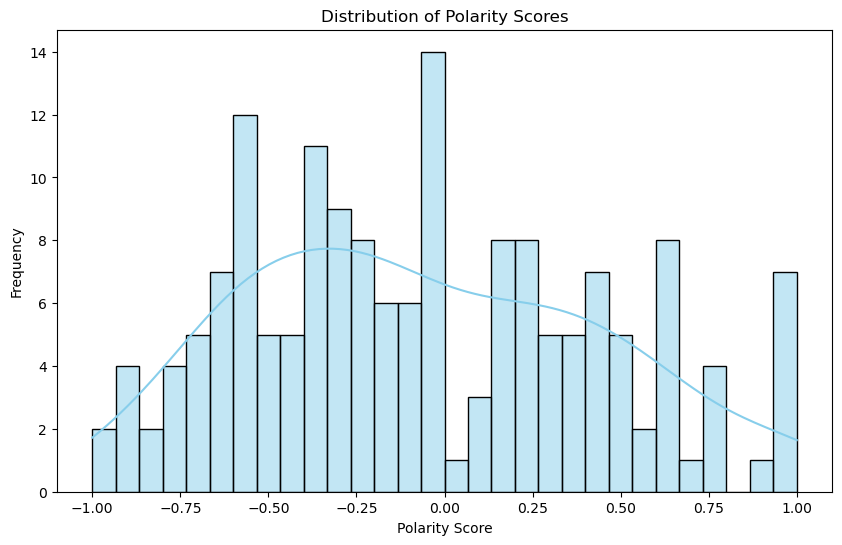

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['POLARITY SCORE'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.show()


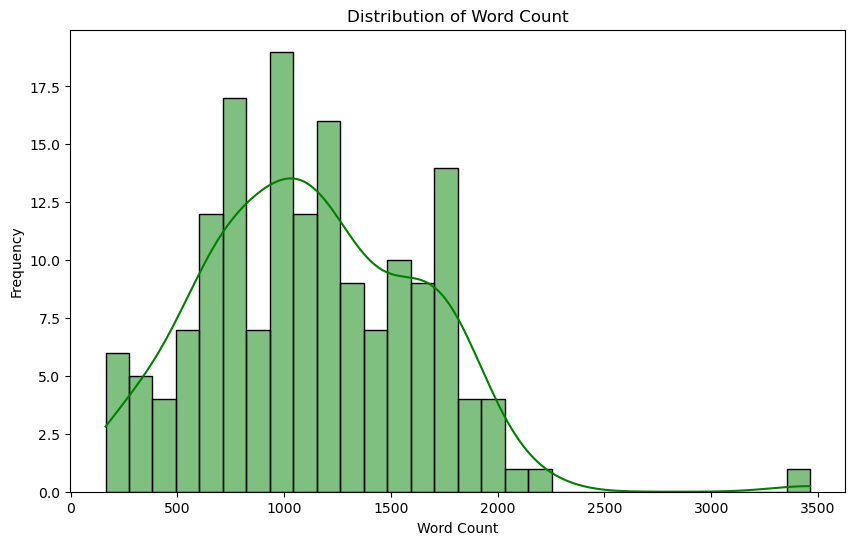

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df['WORD COUNT'], kde=True, bins=30, color='green')
plt.title('Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


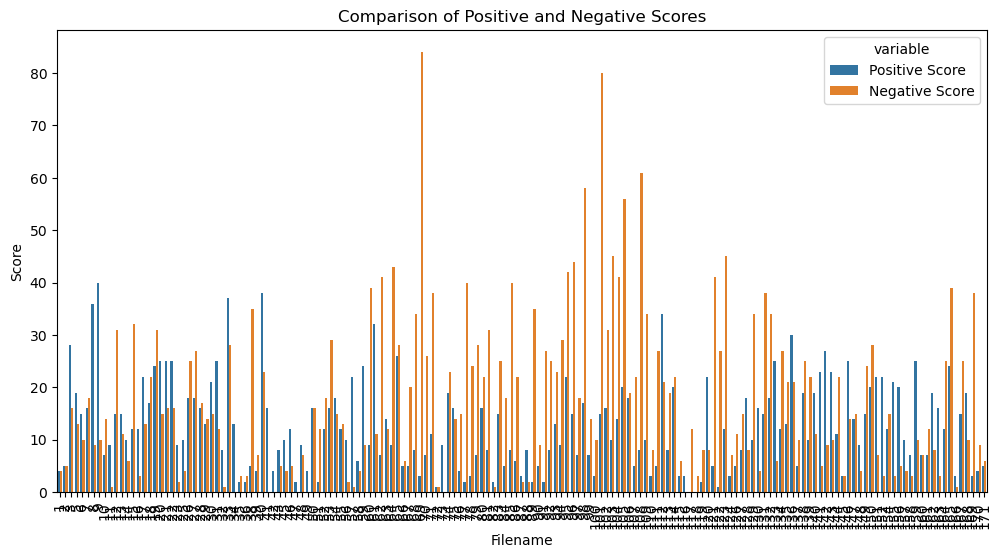

In [82]:
df_melted = df[['Filename', 'Positive Score', 'Negative Score']].melt(id_vars='Filename', value_vars=['Positive Score', 'Negative Score'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Filename', y='value', hue='variable', data=df_melted)
plt.xticks(rotation=90)
plt.title('Comparison of Positive and Negative Scores')
plt.ylabel('Score')
plt.xlabel('Filename')
plt.show()


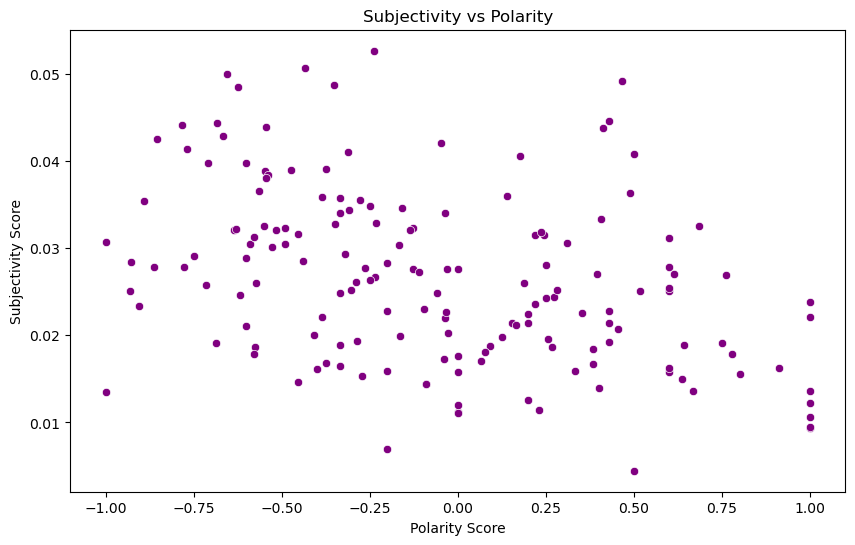

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='POLARITY SCORE', y='SUBJECTIVITY SCORE', color='purple')
plt.title('Subjectivity vs Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Subjectivity Score')
plt.show()


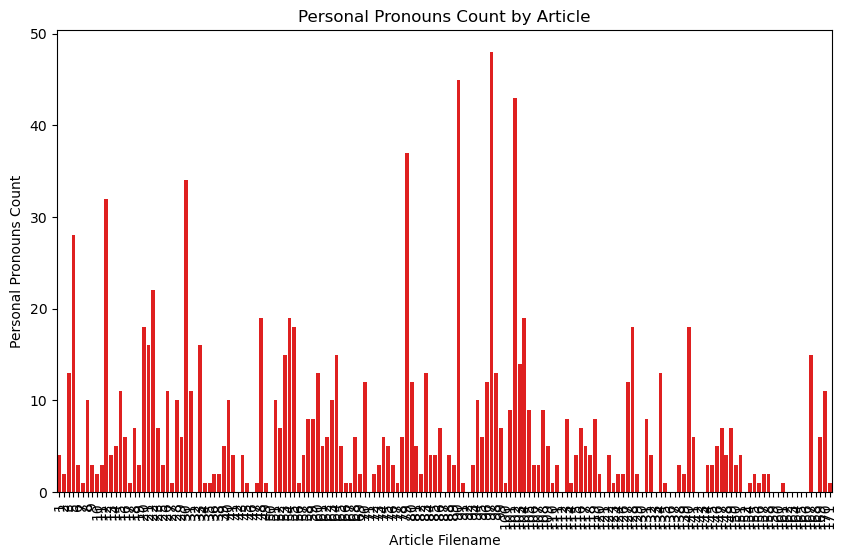

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Filename', y='PERSONAL PRONOUNS', data=df, color='red')
plt.xticks(rotation=90)
plt.title('Personal Pronouns Count by Article')
plt.ylabel('Personal Pronouns Count')
plt.xlabel('Article Filename')
plt.show()


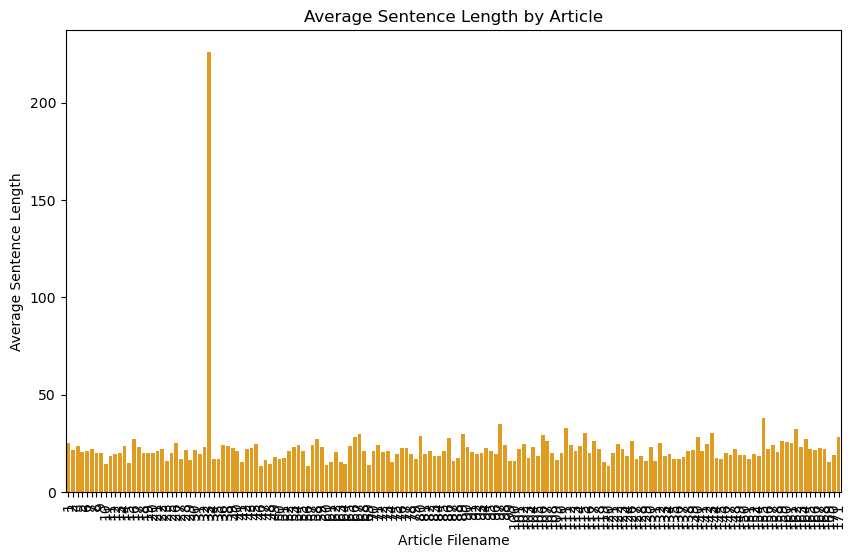

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Filename', y='AVG SENTENCE LENGTH', data=df, color='orange')
plt.xticks(rotation=90)
plt.title('Average Sentence Length by Article')
plt.ylabel('Average Sentence Length')
plt.xlabel('Article Filename')
plt.show()
